# Basic Imports

In [1]:
from util_celeb import *
import wandb

cwd = os.getcwd()
%reload_ext autoreload
%autoreload 2

config_path=f"{cwd}/models/configs/celebahq-ldm-vq-4.yaml"
model_path=f"{cwd}/models/CelebA.ckpt"

!wandb login 4baa24c4fc6c8eed782cacb721d34977149d4fcb

c:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Administrator/.netrc


In [6]:
del teacher, sampler_teacher, student, sampler_student, optimizer, scheduler
torch.cuda.empty_cache()

NameError: name 'teacher' is not defined

# Create teacher and student model

Both:

In [2]:
teacher, sampler_teacher, student, sampler_student = create_models(config_path, model_path, student=True)

Loading model from d:\OneDrive\Uni\Master_Project_AI\Code\Diffusion_Thesis\cin_256/models/cin256_original.ckpt


c:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\pytorch_lightning\utilities\distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 400.92 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


Only the student or teacher:

(setting student=False will only return a single model)

In [2]:
# teacher, sampler_teacher = create_models(config_path, model_path, student=False)
student, sampler_student = create_models(config_path, model_path, student=False)

Loading model from d:\OneDrive\Uni\Master_Project_AI\Code\Diffusion_Thesis\cin_256/models/cin256_original.ckpt


c:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\pytorch_lightning\utilities\distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 400.92 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


# Loading trained student as teacher

In [2]:
model_path_test = f"{cwd}/data/trained_models/10/student_intermediate_15.pt"
teacher, sampler_teacher, optimizer, scheduler = load_trained(model_path_test, config_path)

c:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\pytorch_lightning\utilities\distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 400.92 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


## Generating WITHOUT intermediates saved

In [ ]:
img, x_T_copy, class_prompt, intermediates  = generate(teacher, sampler_teacher, steps=128, scale=3, keep_intermediates=False)
img

# Generating WITH intermediates saved

In [7]:
intermediates, starting_noise, class_prompt = return_intermediates_for_student(teacher, sampler_teacher, steps=250)

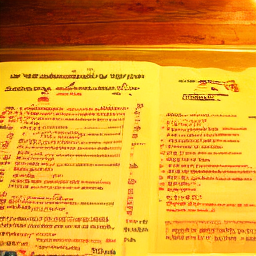

In [14]:
latent_to_img(teacher, intermediates[125])

# Creating a dataset

In [4]:
# dataset_path = f"{cwd}/data/pre_generated/teacher_128/"
# dataset_name = "teacher_128.pt"
# make_dataset(teacher, sampler_teacher, 501, 128, dataset_path, dataset_name)

100%|██████████| 500/500 [1:26:03<00:00, 10.33s/it]


# Training student from teacher directly

In [ ]:
wandb_session = wandb_log(name="test_loss", lr=1e-8, model=student, tags=["test"], notes="Just a test")

optimizer, scheduler = get_optimizer(sampler_student, iterations=20*20)
teacher_train_student(teacher, sampler_teacher, student, sampler_student, optimizer, scheduler, steps=20, generations=20, early_stop=True, session=wandb_session)

wandb.finish()

Extra, quick comparison:

In [ ]:
images, _ = compare_teacher_student(teacher, sampler_teacher, student, sampler_student, steps=[1, 2, 4, 8, 16, 32, 64])
images

c:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


Loading model from c:\Diffusion_Thesis\cin_256/models/CelebA.ckpt


c:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\pytorch_lightning\utilities\distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 274.06 M params.
Keeping EMAs of 370.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from models/first_stage_models/vq-f4/model.ckpt with 0 missing and 55 unexpected keys
Training LatentDiffusion as an unconditional model.


100%|██████████| 10/10 [00:57<00:00,  5.72s/it, epoch_loss=194, lr=[0.0050000000000000044]]  


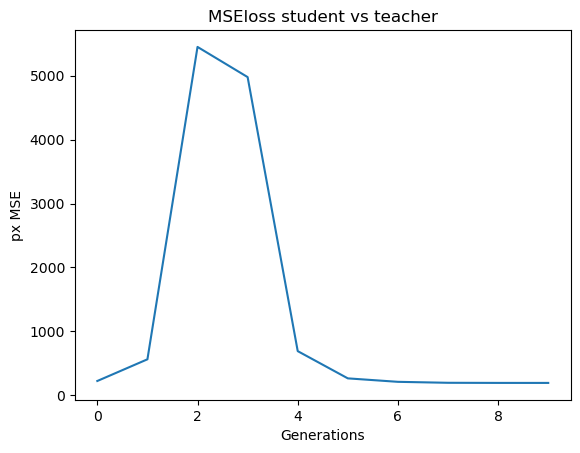

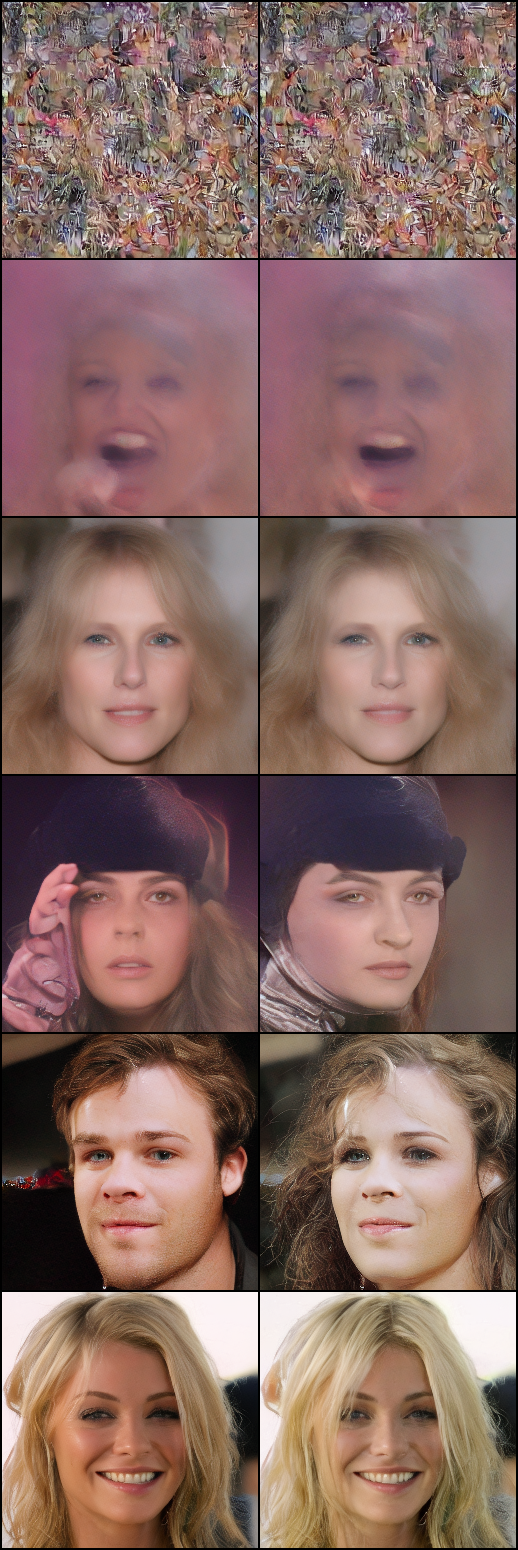

In [1]:
from util_celeb import *
import wandb

cwd = os.getcwd()
%reload_ext autoreload
%autoreload 2

# config_path=f"{cwd}/models/configs/cin256-v2-custom.yaml"
# model_path=f"{cwd}/models/cin256_original.ckpt"

config_path=f"{cwd}/models/configs/celebahq-ldm-vq-4.yaml"
model_path=f"{cwd}/models/CelebA.ckpt"


teacher, sampler_teacher, student, sampler_student = create_models(config_path, model_path, student=True)

optimizer, scheduler = get_optimizer(sampler_student, iterations=32*10)
teacher_train_student(teacher, sampler_teacher, student, sampler_student, optimizer, scheduler, steps=32, generations=10, early_stop=False, session=None)

images, _ = compare_teacher_student(teacher, sampler_teacher, student, sampler_student, steps=[1, 2, 4, 8, 16, 32])


del teacher, sampler_teacher, student, sampler_student, optimizer, scheduler
torch.cuda.empty_cache()

images

In [6]:
del teacher, sampler_teacher, student, sampler_student, optimizer, scheduler
torch.cuda.empty_cache()

# Train student from pre-generated teacher dataset

In [3]:
data_dir = f"{cwd}/data/pre_generated/teacher_128/"
datasets = os.listdir(data_dir)

In [ ]:
notes = """This is a serious attempt to distill the 128 step original teacher into a 64 step student, trained on 32000 instances"""
wandb_session = wandb_log(name="Train_student_on_128_pretrained", lr=0.00000001, model=student, tags=["distillation"], notes=notes)

optimizer, scheduler = get_optimizer(sampler_student, iterations=64*500)

dataset = torch.load(data_dir + datasets[0])
train_student_from_dataset(student, sampler_student, dataset, 64, optimizer, scheduler, early_stop=True, session=wandb_session)

wandb.finish()

save_model(sampler_student, optimizer, scheduler, name="lr8_scheduled", steps=64)

# Save and Loading trained models

In [ ]:
save_model(sampler_student, optimizer, scheduler, name="lr8_scheduled", steps=64)

In [ ]:
path = f"{cwd}/data/trained_models/64/student_lr8_scheduled.pt"
student, sampler_student, optimizer, scheduler = load_trained(path, config_path)

# Direct Comparison

In [ ]:
images, _ = compare_teacher_student(teacher, sampler_teacher, student, sampler_student, steps=[1, 2, 4, 8, 16, 32, 64, 128])
images



# Distillation Loop (allnighter)

c:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Administrator/.netrc


Loading model from c:\Diffusion_Thesis\cin_256/models/CelebA.ckpt


c:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\pytorch_lightning\utilities\distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 274.06 M params.
Keeping EMAs of 370.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from models/first_stage_models/vq-f4/model.ckpt with 0 missing and 55 unexpected keys
Training LatentDiffusion as an unconditional model.


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: pmobiluss. Use `wandb login --relogin` to force relogin


100%|██████████| 7/7 [02:39<00:00, 22.83s/it, epoch_loss=0.00534, lr=[0.0]]                   


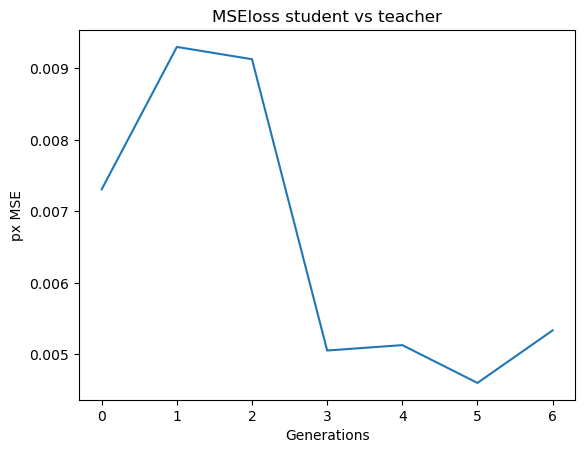

generation_loss,▅██▂▂▁▂
intermediate_loss,▄▂▁▂▂▂▆▂▁▂▁▄▃▁▁▁▂▃▁▁▁▁▂▄▁▁▁▁▄▂▁▂▁▂█▁▁▁▂▄
generation_loss,0.00534
intermediate_loss,0.01237


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 274.06 M params.
Keeping EMAs of 370.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from models/first_stage_models/vq-f4/model.ckpt with 0 missing and 55 unexpected keys
Training LatentDiffusion as an unconditional model.


100%|██████████| 15/15 [02:51<00:00, 11.42s/it, epoch_loss=0.00948, lr=[0.0]]                   


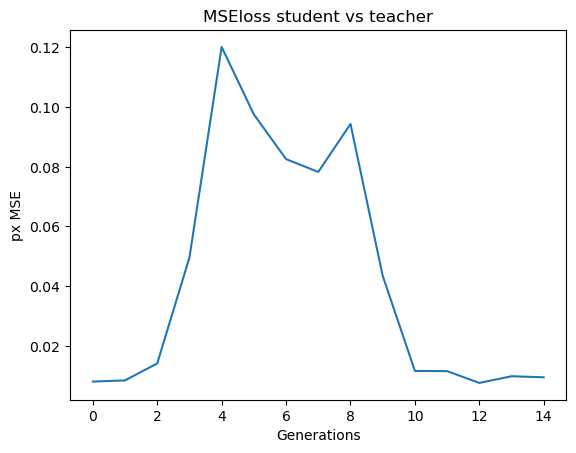

generation_loss,▁▁▁▄█▇▆▅▆▃▁▁▁▁▁
intermediate_loss,▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁█▁▁▁▁▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
generation_loss,0.00948
intermediate_loss,0.0153


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 274.06 M params.
Keeping EMAs of 370.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from models/first_stage_models/vq-f4/model.ckpt with 0 missing and 55 unexpected keys
Training LatentDiffusion as an unconditional model.


100%|██████████| 31/31 [02:57<00:00,  5.71s/it, epoch_loss=0.0042, lr=[0.0]]                    


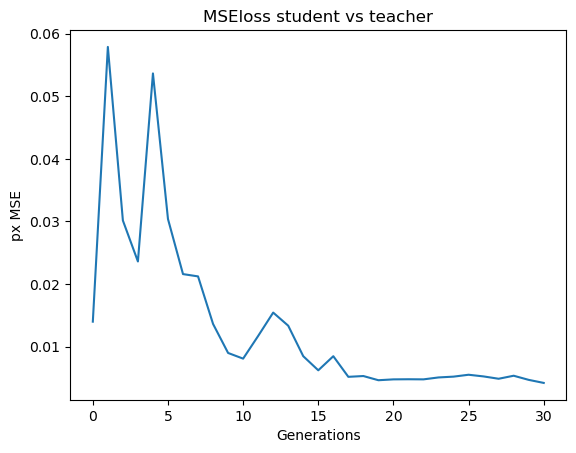

generation_loss,▂█▄▄▇▄▃▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
intermediate_loss,▂█▂▂▁█▂▂▁▂▇▂▁▁▁█▂▁▂██▂▂▁█▁▂▁▁▇▂▁▁▁█▂▁▁█▇
generation_loss,0.0042
intermediate_loss,0.02719


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 274.06 M params.
Keeping EMAs of 370.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from models/first_stage_models/vq-f4/model.ckpt with 0 missing and 55 unexpected keys
Training LatentDiffusion as an unconditional model.


100%|██████████| 62/62 [02:58<00:00,  2.88s/it, epoch_loss=0.0236, lr=[0.0]]                   


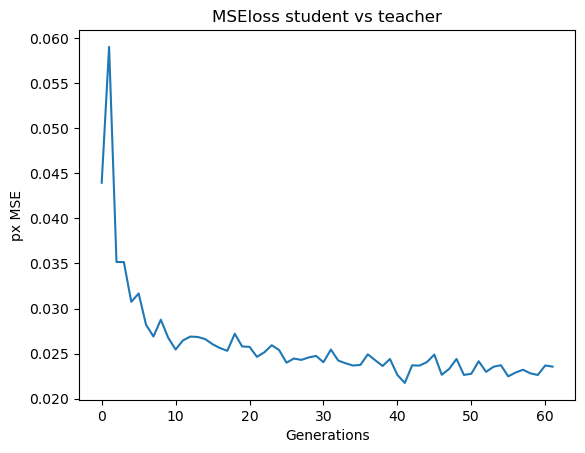

generation_loss,▅█▃▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
intermediate_loss,▁█▁█▁█▁▁█▁█▁▇▇▁█▁▇▁▇▇▁▇▁▇▁▁▇▁▇▁▇▁▁▇▁▇▁▇▇
generation_loss,0.02356
intermediate_loss,0.16482


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 274.06 M params.
Keeping EMAs of 370.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from models/first_stage_models/vq-f4/model.ckpt with 0 missing and 55 unexpected keys
Training LatentDiffusion as an unconditional model.


 23%|██▎       | 29/125 [00:42<02:21,  1.47s/it, epoch_loss=0.0717, lr=[8.729705727120911e-06]]


KeyboardInterrupt: 

In [1]:
from util_celeb import *
import wandb

cwd = os.getcwd()
%reload_ext autoreload
%autoreload 2
!wandb login 4baa24c4fc6c8eed782cacb721d34977149d4fcb

ddim_steps = [128, 64, 32, 16, 8, 4, 2]
run_name = "True_Attempt"
generations = 500
config=f"{cwd}/models/configs/celebahq-ldm-vq-4.yaml"
original_model_path=f"{cwd}/models/CelebA.ckpt"
distill(ddim_steps, generations, run_name, config, original_model_path)